In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\Projects\\NBALongivity\\nba_logreg.csv")

In [3]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [5]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train = np.nan_to_num(X_train)

In [29]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [30]:
y_pred = rand_clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 64  54]
 [ 26 124]]


0.7014925373134329

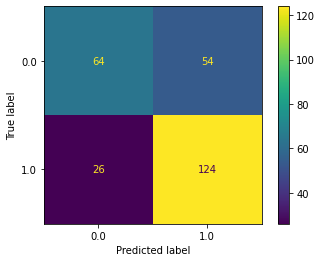

In [35]:
from sklearn.metrics import plot_confusion_matrix
plt_cm = plot_confusion_matrix(rand_clf,X_test,y_test)
plt_cm

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
# spot check some algorithms
models = []
models.append(('RF', RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)))
models.append(('DTR', DecisionTreeClassifier(criterion="entropy", random_state=0)))
models.append(('GNB', GaussianNB()))
models.append(('RBF', SVC(kernel="rbf", random_state=0)))
models.append(('SVM', SVC(kernel="linear", random_state=0)))

In [34]:
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    yy_pred = model.predict(X_test)
    clf_results = accuracy_score(y_test, yy_pred)
    results.append(clf_results)
    names.append(name)
    msg = (name, clf_results)
    print(msg)

('RF', 0.667910447761194)
('KNN', 0.6567164179104478)
('DTR', 0.6007462686567164)
('GNB', 0.7014925373134329)
('RBF', 0.6977611940298507)
('SVM', 0.7089552238805971)
